# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [8]:
col_corr = app_train.corr()['TARGET']

In [9]:
type(col_corr)

pandas.core.series.Series

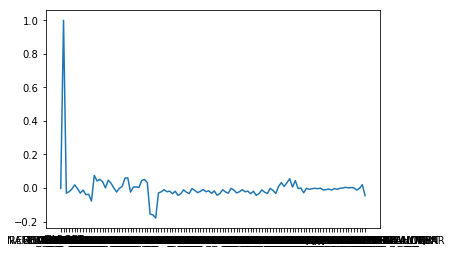

In [12]:
plt.plot(col_corr)
plt.show()

In [18]:
index_name = col_corr.index
index_name

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=110)

In [20]:
col_value = col_corr.values
col_value

array([-2.10846902e-03,  1.00000000e+00, -3.08959082e-02, -2.18509385e-02,
       -6.14838770e-03,  1.91871336e-02, -3.98186560e-03, -3.03692865e-02,
       -1.28165615e-02, -3.96452812e-02, -3.72271485e-02, -7.82393083e-02,
        7.49584574e-02,  4.19748628e-02,  5.14571726e-02,  3.76115643e-02,
        5.34395579e-04,  4.59822197e-02,  2.85243224e-02,  3.70126802e-04,
       -2.38062723e-02, -1.75838343e-03,  9.30778440e-03,  5.88990149e-02,
        6.08926676e-02, -2.41658314e-02,  5.57594452e-03,  6.94190755e-03,
        2.81947918e-03,  4.43953748e-02,  5.09944644e-02,  3.25183411e-02,
       -1.55317126e-01, -1.60471672e-01, -1.78918698e-01, -2.94975646e-02,
       -2.27457432e-02, -9.72767327e-03, -2.21492841e-02, -1.85496616e-02,
       -3.41987937e-02, -1.91721820e-02, -4.40033705e-02, -3.36135033e-02,
       -1.08848227e-02, -2.50305333e-02, -3.29971175e-02, -3.17610752e-03,
       -1.35780698e-02, -2.72838707e-02, -1.99522839e-02, -9.03644735e-03,
       -2.20682038e-02, -

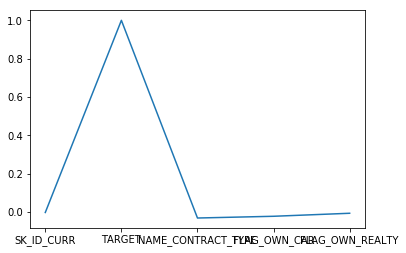

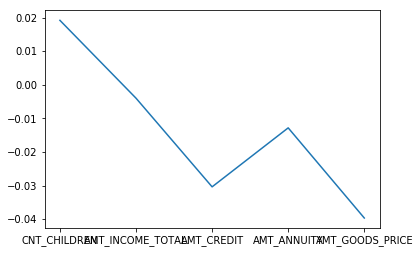

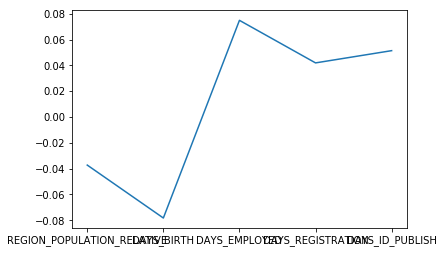

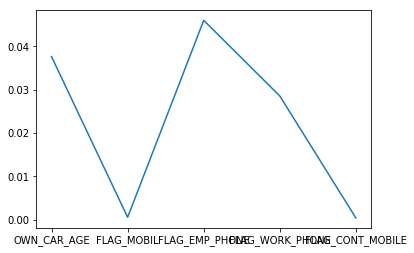

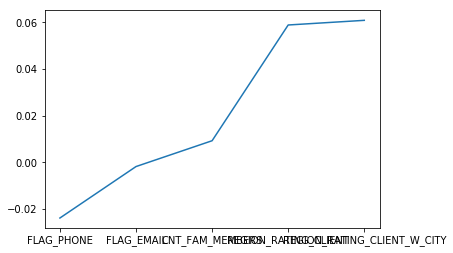

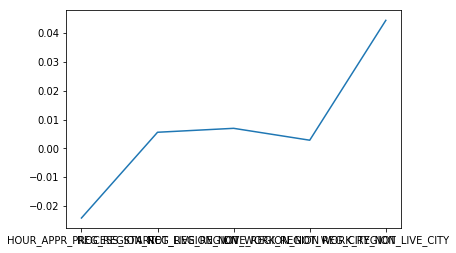

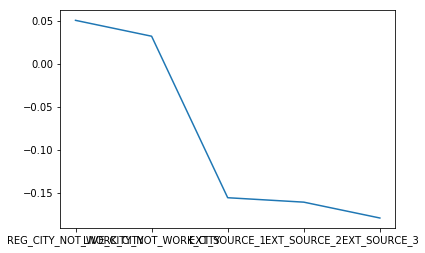

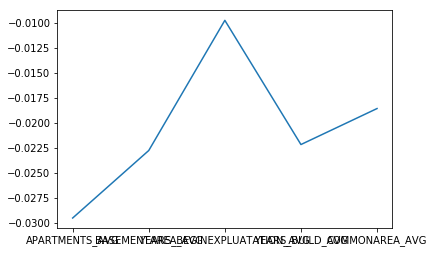

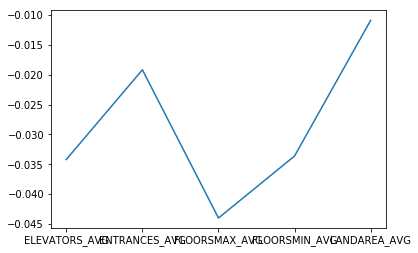

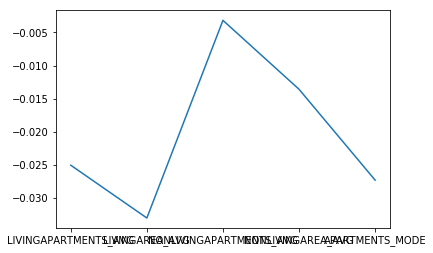

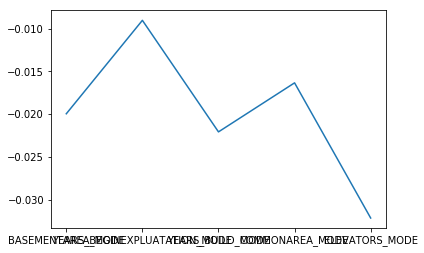

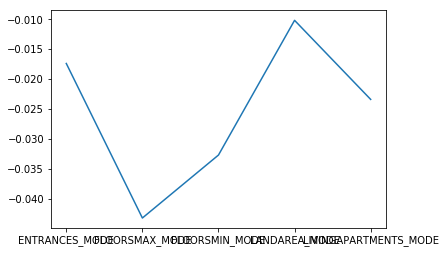

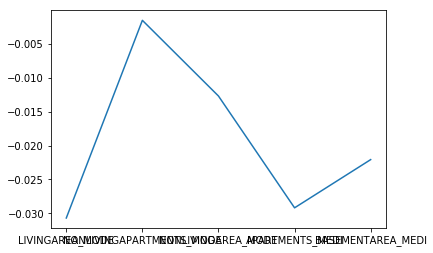

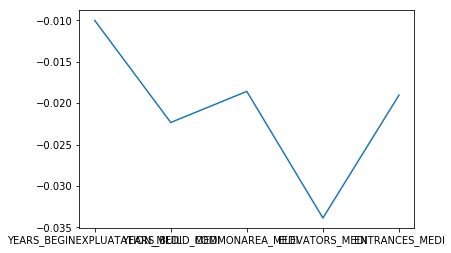

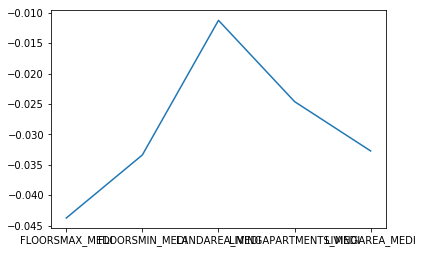

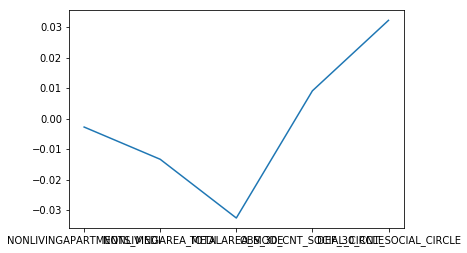

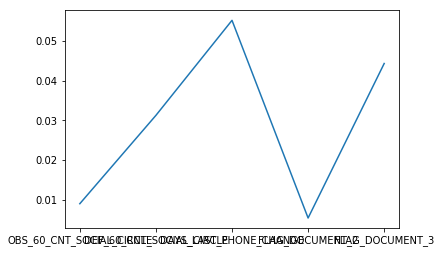

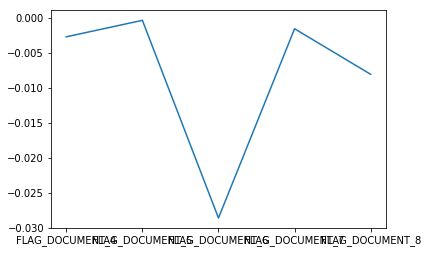

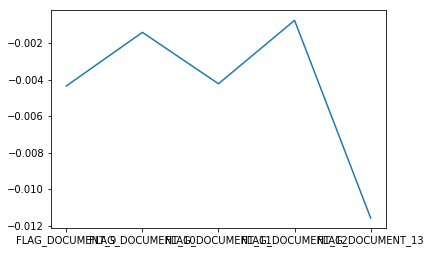

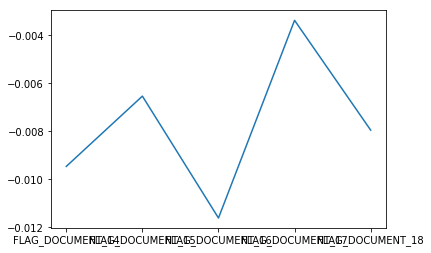

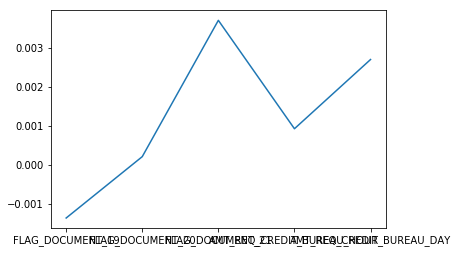

In [32]:
j = 0
a1 = []
a2 = []
for i in range(len(index_name)):
    if j == 5:
        plt.plot(pd.Series(a2, index=a1))
        plt.show()
        a1 = []
        a2 = []
        j = 0
    a1.append(index_name[i])
    a2.append(col_value[i])
    j += 1
    

In [27]:
a

[['SK_ID_CURR', -0.0021084690182032236],
 ['TARGET', 1.0],
 ['NAME_CONTRACT_TYPE', -0.030895908161216207],
 ['FLAG_OWN_CAR', -0.021850938463875168],
 ['FLAG_OWN_REALTY', -0.006148387704583926]]

In [31]:
pd.Series(a1, index=a2)

 0.000788    AMT_REQ_CREDIT_BUREAU_WEEK
-0.012462     AMT_REQ_CREDIT_BUREAU_MON
-0.002022     AMT_REQ_CREDIT_BUREAU_QRT
 0.019930    AMT_REQ_CREDIT_BUREAU_YEAR
-0.045987            DAYS_EMPLOYED_ANOM
dtype: object